## Loading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../../corpus_sprint2_balanced_cp.csv", encoding="utf-8")
df = df.dropna()

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

vectors = model.docvecs.vectors_docs

## One hot encoding

In [2]:
#print(df)
one_hot = pd.Categorical(df['Product'])
df_dummies = pd.get_dummies(one_hot)

v_df = pd.DataFrame(vectors)
X = pd.concat([v_df, df_dummies], axis = 1)
print(X)

               0         1         2         3         4         5         6  \
0      -0.206502 -0.089569 -0.479192 -0.607455  0.441230 -0.835218  0.229955   
1      -0.199045  0.245777 -0.058751 -0.922997  0.417415 -0.339759 -0.466736   
2      -0.117612 -0.230441  0.104659 -0.059141  0.244450 -0.532243 -0.273285   
3      -0.056852 -0.428939 -0.503455  0.431379 -0.107010 -0.341381 -1.130548   
4      -0.144027 -0.137468 -0.196015 -0.340400  0.788206 -0.180849 -0.526431   
...          ...       ...       ...       ...       ...       ...       ...   
111629  0.475766  0.044374 -0.918518 -0.464938  0.257347 -0.190196 -0.419938   
111630 -0.492041 -0.346752 -0.051855  0.526952  0.830449 -0.631116 -0.493316   
111631  0.082189  0.002191  0.222593  0.533906  0.391737  0.046392 -0.482322   
111632  0.238248 -0.162442  0.073858  0.188567  0.301132 -0.020022 -0.073487   
111633 -0.241412 -0.182984 -0.777466  0.257785  0.239757 -0.851278 -0.222554   

               7         8         9  .

## Applying DBSCAN

In [3]:
#sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
#eps: float, default=0.5 The maximum distance between two samples for one to be considered as in the neighborhood of the other.

db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [4]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [5]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 50
Estimated number of noise points: 109764


## Visualisation

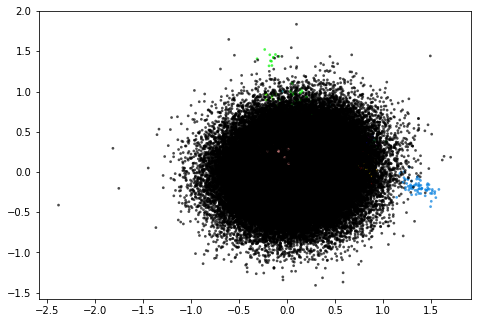

In [7]:
import matplotlib.cm as cm
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])

colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')